## 1. 匯入所需套件

In [12]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

# For functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate, add

## 2. 讀入並整理 Fashion MNSIT 資料集
* Fashion MNSIT 是包含 10 種類的灰階小圖資料集，每張圖的尺寸為  28×28 


In [5]:
# Load fashion_mnist
(x_train, y_train0), (x_test, y_test0) = datasets.fashion_mnist.load_data()

# Reshape
# Normalize the range of features
x_train = x_train.reshape(60000, 28*28) / x_train.max()
x_test = x_test.reshape(10000, 28*28) / x_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

In [6]:
print(x_train.shape, x_test.shape, sep="\n") # 查看數據型態

(60000, 784)
(10000, 784)


## 3. 以Functional API 建立用於分類 Fashion MNSIT 的全連結神經網路

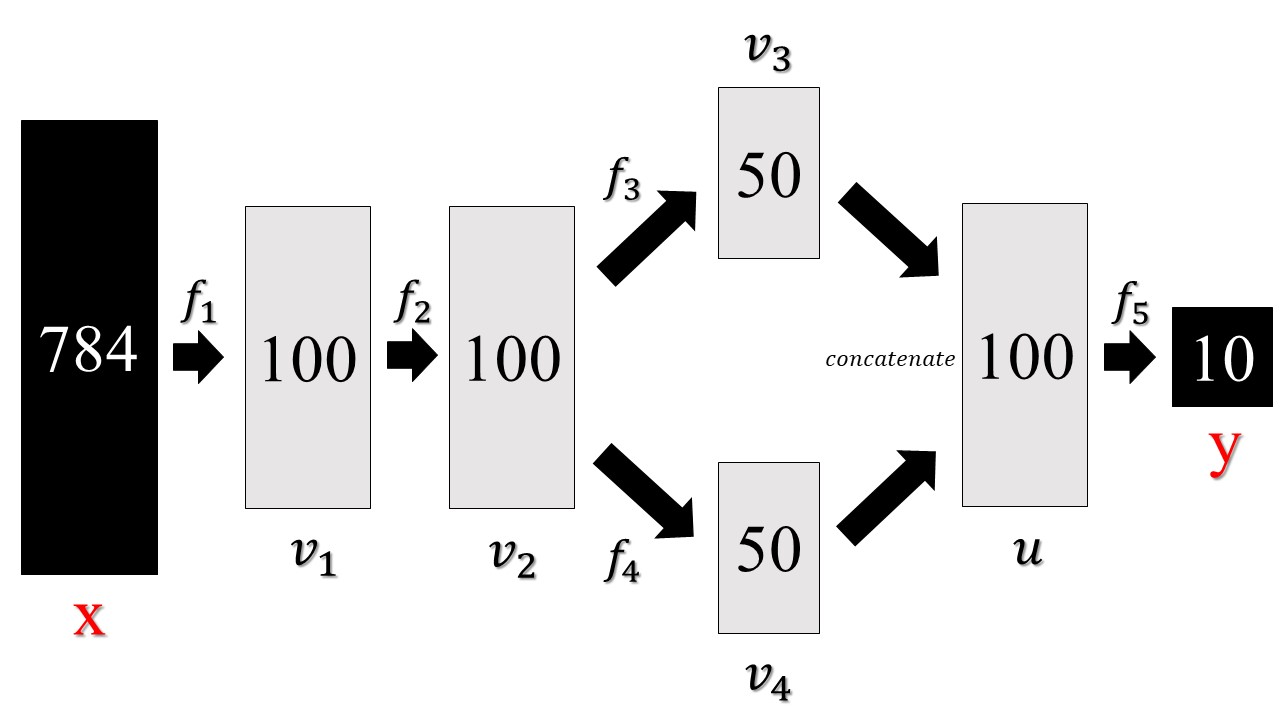

* x = input (784維向量)
* v1 = x 經過 f1 隱藏層運算後之結果 (100維向量)
* v2 = v1 經過 f2 隱藏層運算後之結果 (100維向量) 
* v3 = v2 經過 f3 隱藏層運算後之結果 (50維向量)
* v4 = v2 經過 f4 運算後之結果 (50維向量)
* u = 將 v3, v4 合併後之結果 (100維向量)
* y = u 經過 f5 運算後之結果 (10維向量)

In [14]:
f_1 = Dense(100, activation='sigmoid')
f_2 = Dense(100, activation='sigmoid')
f_3 = Dense(50,activation='relu')
f_4 = Dense(50,activation='relu')
f_5 = Dense(10, activation='softmax')

In [15]:
x = Input(shape=(784,))
print(x)

Tensor("input_2:0", shape=(None, 784), dtype=float32)


In [16]:
v_1 = f_1(x)
v_2 = f_2(v_1)
v_3 = f_3(v_2)
v_4 = f_4(v_2)

# 合併結構
u = concatenate([v_3, v_4])
y = f_5(u)
print(u)
print(y)

Tensor("concatenate_1/Identity:0", shape=(None, 100), dtype=float32)
Tensor("dense_9/Identity:0", shape=(None, 10), dtype=float32)


In [17]:
model = Model(x, y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 100)          78500       input_2[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 100)          10100       dense_5[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 50)           5050        dense_6[0][0]                    
______________________________________________________________________________________________

In [18]:
#組裝神經網路
model.compile(loss='mse', 
              optimizer=Adam(), 
              metrics=['accuracy'])

## 4. 訓練模型

In [22]:
model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=8)

Epoch 1/8
469/469 [==============================] - 1s 3ms/step - loss: 0.0179 - accuracy: 0.8762
Epoch 2/8
469/469 [==============================] - 1s 3ms/step - loss: 0.0172 - accuracy: 0.8821
Epoch 3/8
469/469 [==============================] - 1s 3ms/step - loss: 0.0166 - accuracy: 0.8864
Epoch 4/8
469/469 [==============================] - 1s 2ms/step - loss: 0.0162 - accuracy: 0.8897
Epoch 5/8
469/469 [==============================] - 1s 2ms/step - loss: 0.0158 - accuracy: 0.8929
Epoch 6/8
469/469 [==============================] - 1s 3ms/step - loss: 0.0152 - accuracy: 0.8974
Epoch 7/8
469/469 [==============================] - 1s 3ms/step - loss: 0.0149 - accuracy: 0.8993
Epoch 8/8
469/469 [==============================] - 1s 3ms/step - loss: 0.0147 - accuracy: 0.9002


## 5. 模型預測: 預測資料集的準確率

In [23]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.8747
Train Accuracy: 90.43833613395691
Test Accuracy: 87.47000098228455
